##  Importing Neccesary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

## Reading the data

In [2]:
data = pd.read_excel("vpn_connections.xlsx")
data.head()

,Date,unique_connections,total_connections,total_disconnections,total_disconnections.1
0,2022-09-01,7,17,14.0,14
1,2022-09-02,7,16,19.0,19
2,2022-09-03,1,2,2.0,2
3,2022-09-04,3,4,4.0,4
4,2022-09-05,3,5,15.0,15


In [3]:
data.drop(['total_disconnections'],axis=1,inplace=True)

In [4]:
data.columns = ['date','unique_connections','connections','disconnections']
data["total"] = data['connections'] + data['disconnections']
data.head()

,date,unique_connections,connections,disconnections,total
0,2022-09-01,7,17,14,31
1,2022-09-02,7,16,19,35
2,2022-09-03,1,2,2,4
3,2022-09-04,3,4,4,8
4,2022-09-05,3,5,15,20


In [5]:
data.isna().sum()

date                  0
unique_connections    0
connections           0
disconnections        0
total                 0
dtype: int64

In [6]:
data.dropna().describe()

,unique_connections,connections,disconnections,total
count,78.000000,78.000000,78.000000,78.000000
mean,7.935897,19.128205,19.051282,38.179487
std,5.527593,18.192591,17.908786,36.041370
min,0.000000,0.000000,0.000000,0.000000
25%,3.250000,6.000000,6.000000,12.000000
50%,8.000000,15.500000,15.000000,31.000000
75%,11.000000,21.750000,22.000000,43.750000
max,22.000000,70.000000,70.000000,140.000000


In [7]:
df = data[['date','connections']]

In [8]:
df.head()

,date,connections
0,2022-09-01,17
1,2022-09-02,16
2,2022-09-03,2
3,2022-09-04,4
4,2022-09-05,5


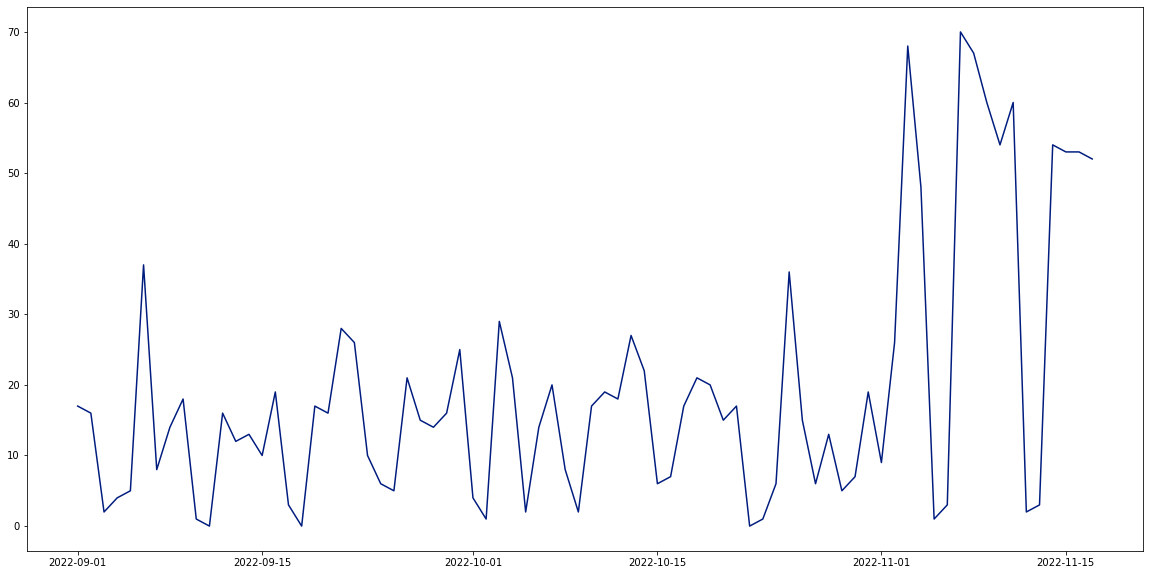

In [9]:
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(20,10))
plt.plot(df["date"], df["connections"])
plt.show()

<Figure size 432x288 with 0 Axes>

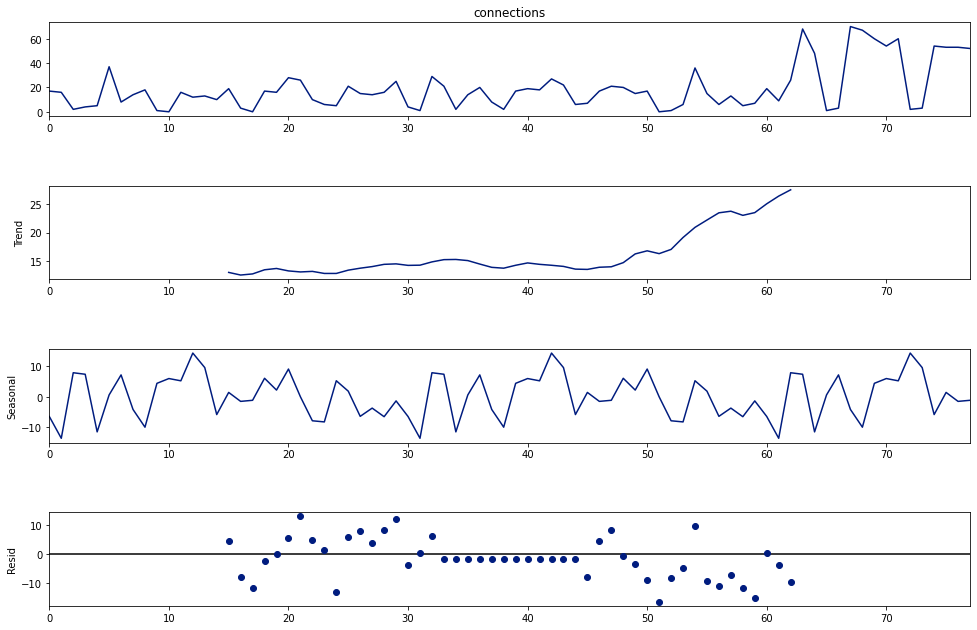

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df["connections"], 
                            model='additive',period=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

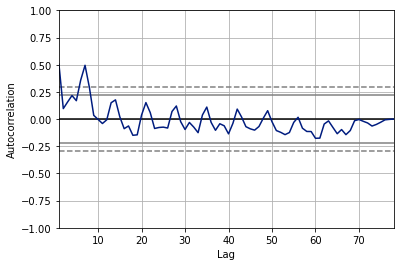

In [11]:
pd.plotting.autocorrelation_plot(df["connections"])

/Users/anthony/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


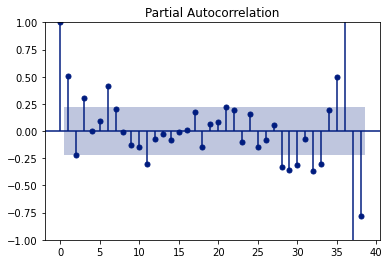

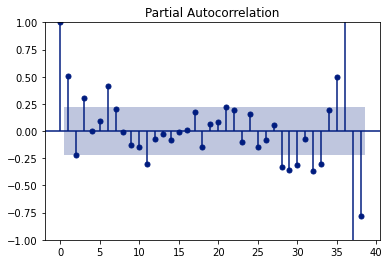

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df["connections"], lags = 38)

In [13]:
p, d, q = 3, 1, 2
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df["connections"], order=(p,d,q))  
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:            connections   No. Observations:                   78
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -312.967
Date:                Tue, 28 Feb 2023   AIC                            637.933
Time:                        16:46:18   BIC                            651.996
Sample:                             0   HQIC                           643.558
                                 - 78                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1367      1.306      0.105      0.917      -2.423       2.696
ar.L2         -0.3479      0.418     -0.831      0.406      -1.168       0.472
ar.L3         -0.0140      0.570     -0.025      0.9

/Users/anthony/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/anthony/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [14]:
prediction1 = fitted.predict()
print(prediction1)

0      0.000000
1     16.999479
2     16.095935
3      4.596023
4     11.340070
        ...    
73    13.422831
74    39.186373
75    55.932905
76    33.430822
77    43.009800
Name: predicted_mean, Length: 78, dtype: float64


<AxesSubplot:>

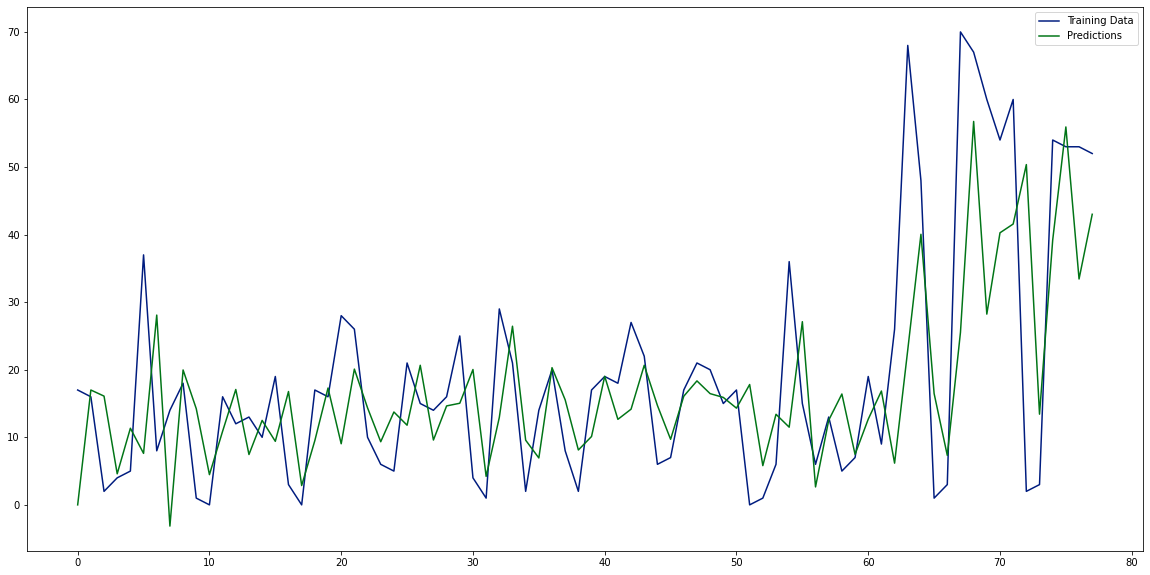

In [15]:
df["connections"].plot(legend=True, label="Training Data", figsize=(20, 10))
prediction1.plot(legend=True, label="Predictions")

In [16]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(df['connections'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/Users/anthony/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/anthony/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/anthony/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.04919D+00    |proj g|=  9.57360D-01

At iterate    5    f=  3.54300D+00    |proj g|=  1.91553D-02

At iterate   10    f=  3.53851D+00    |proj g|=  1.27620D-02

At iterate   15    f=  3.53499D+00    |proj g|=  2.70525D-03

At iterate   20    f=  3.53469D+00    |proj g|=  7.31708D-03

At iterate   25    f=  3.53460D+00    |proj g|=  1.13772D-04

At iterate   30    f=  3.53460D+00    |proj g|=  2.25393D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

In [18]:
predictions = model.predict(len(data), len(data)+30)
print(predictions)

78     55.764455
79     49.230571
80     45.103706
81     50.346587
82     46.863975
83     49.685529
84     45.193050
85     37.887445
86     55.053564
87     69.967364
88     61.838099
89     41.367507
90     53.628019
91     75.757946
92     67.910742
93     68.363834
94     64.624013
95     68.717376
96     45.208637
97     40.263279
98     72.401864
99     85.471611
100    77.905052
101    59.444350
102    67.774258
103    87.636187
104    81.540646
105    82.841040
106    78.429908
107    82.159697
108    58.883423
Name: predicted_mean, dtype: float64


<AxesSubplot:>

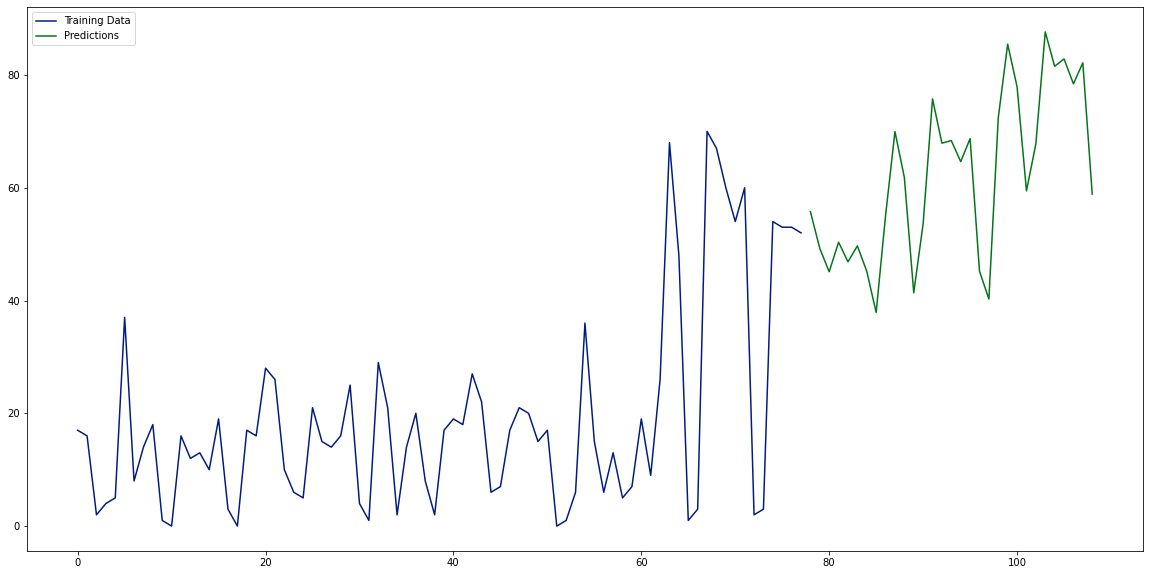

In [19]:
df["connections"].plot(legend=True, label="Training Data", figsize=(20, 10))
predictions.plot(legend=True, label="Predictions")

### Notes
    -p is the number of lagged values that need to be added or subtracted from the values (label column).
     It captures the autoregressive part of ARIMA.
     
    -d represents the number of times the data needs to differentiate to produce a stationary signal.
     If it’s stationary data, the value of d should be 0, and if it’s seasonal data, the value of d should be 1.
     d captures the integrated part of ARIMA.
     
    -q is the number of lagged values for the error term added or subtracted from the values (label column).
     It captures the moving average part of ARIMA.